<a href="https://colab.research.google.com/github/CKrishnaGhrini/Customer_Purchase_Prediction/blob/main/Project_Customer_Behaviour_Pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
customer=pd.read_csv('/content/Customer_Behaviour.csv')

In [ ]:
customer.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
customer.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
customer.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
customer.drop('User ID',axis=1,inplace=True)

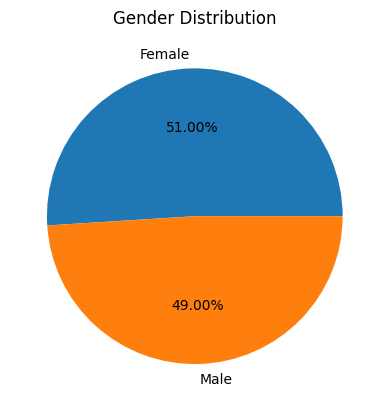

In [ ]:
plt.pie(customer['Gender'].value_counts(),labels=customer['Gender'].value_counts().index,autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.show()

<ipython-input-30-f00e252b5c53>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer['Age'])


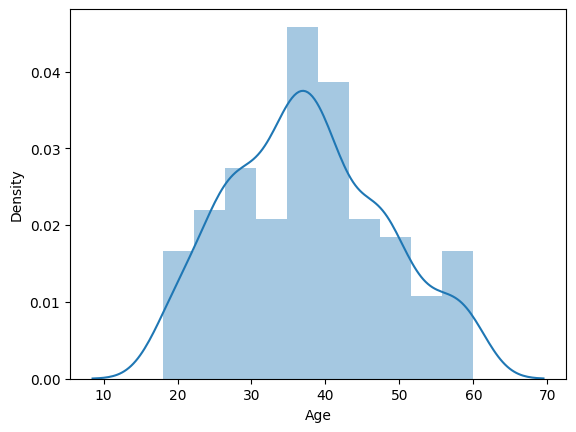

In [ ]:
sns.distplot(customer['Age'])
plt.show()

<ipython-input-31-1bdc721ba3ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer['EstimatedSalary'],color="red")


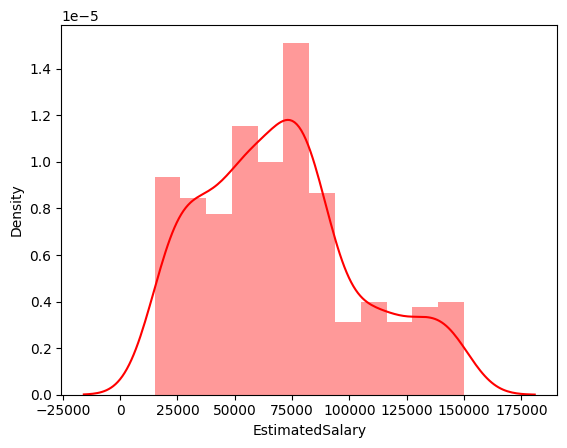

In [ ]:
sns.distplot(customer['EstimatedSalary'],color="red")
plt.show()

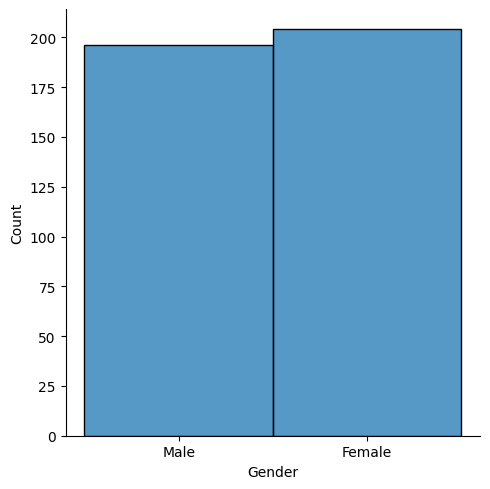

In [ ]:
sns.displot(customer['Gender'])
plt.show()

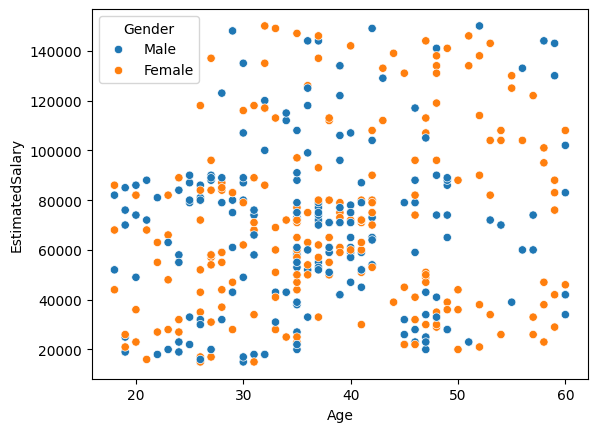

In [ ]:
sns.scatterplot(x=customer['Age'],y=customer['EstimatedSalary'],hue=customer['Gender'])
plt.show()

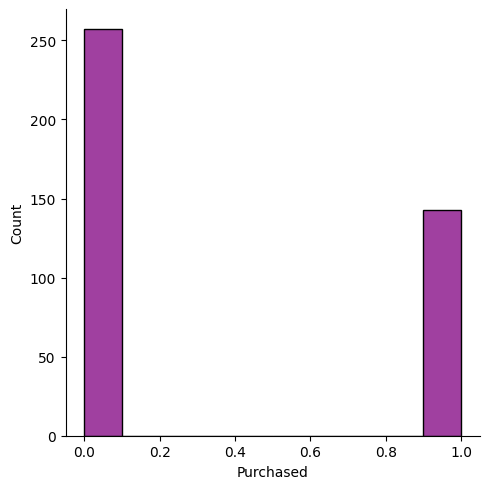

In [ ]:
sns.displot(customer['Purchased'],color='purple')
plt.show()

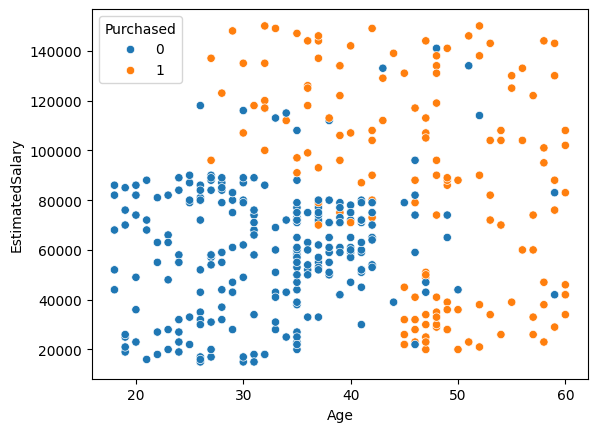

In [ ]:
sns.scatterplot(x=customer['Age'],y=customer['EstimatedSalary'],hue=customer['Purchased'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
customer['Gender']=le.fit_transform(customer['Gender'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifie

In [ ]:
X=customer[['Gender','Age','EstimatedSalary']]
y=customer['Purchased']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
print(len(X_train))
print(len(X_test))

320
80


In [ ]:
nb=GaussianNB()
nb.fit(X_train,y_train)


GaussianNB()

In [ ]:
y_pred=nb.predict(X_test)
nb_accuracy=(accuracy_score(y_test,y_pred))


In [ ]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[50  2]
 [ 3 25]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        52
           1       0.93      0.89      0.91        28

    accuracy                           0.94        80
   macro avg       0.93      0.93      0.93        80
weighted avg       0.94      0.94      0.94        80



In [ ]:
svm=SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_svc_pred=svm.predict(X_test)
svc_accuracy=(accuracy_score(y_test,y_svc_pred))

In [ ]:
print(confusion_matrix(y_test,y_svc_pred))
print(classification_report(y_test,y_svc_pred))

[[49  3]
 [18 10]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80



In [ ]:
logr=LogisticRegression()
logr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_logr_predict=logr.predict(X_test)
logr_accuracy=(accuracy_score(y_test,y_logr_predict))

In [ ]:
print(confusion_matrix(y_test,y_logr_predict))
print(classification_report(y_test,y_logr_predict))

[[52  0]
 [28  0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


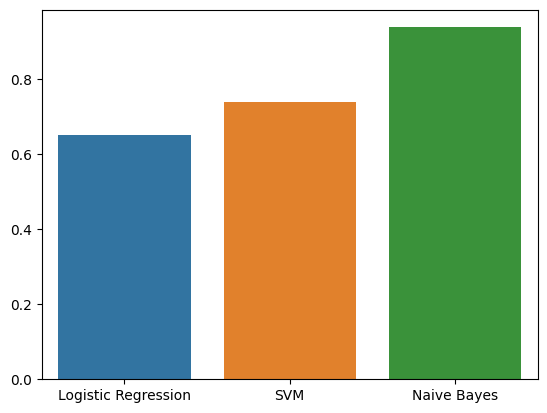

In [ ]:
sns.barplot(x=['Logistic Regression','SVM','Naive Bayes'],y=[logr_accuracy,svc_accuracy,nb_accuracy],hue=['Logistic Regression','SVM','Naive Bayes'])
plt.show()

I trained my model using three algorithms: Logistic Regression, SVM, and Naive Bayes, achieving accuracies of 0.64, 0.74, and 0.94, respectively. Since Naive Bayes yielded the highest accuracy, I will proceed with it.